# Proyecto: Análisis del mercado inmobiliario de la Ciudad de Buenos Aires

Mentor: Javier Lezama.

javitolez@gmail.com

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal www.Properati.com.ar.

# El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 


# Los atributos


A continuación vamos a describir los atributos que consideramos en esta muestra:

* id: id de la propiedad
* created_on: fecha en la que la propiedad ingresó al sitio
* operation: alquiler (rent) o venta (sell)
* property_type: tipo de propiedad (casa, departamento, ph, etcétera)
* place_with_parent_names: nombre del lugar donde se encuentra la propiedad según el publicador
* lat-lon: coordenadas concatenadas
* lat: latitud
* lon: longitud
* price: precio en la moneda especificada en currency
* currency: divisa en la que está expresada la publicación
* price_aprox_usd: precio aproximado en dólares estadounidenses
* surface_total_in_m2: superficie total (en metros cuadrados)
* surface_covered_in_m2: superficie cubierta (en metros cuadrados)
* price_usd_per_m2: precio por metro cuadrado en dólares (precio dólares / superficie)
* floor: número de piso (si corresponde)
* rooms: cantidad de ambientes
* expenses: expensas (si corresponde)
* barrio: barrio según cartografía oficial
* properati_url: url de la publicación en Properati

# Manos a la obra

Primero Importaremos las librerias necesarias para poder cargar el dataset. 

Para eso trabajaremos con las librerias vistas en las primeras clases de la diplomatura:

Nunpy
Pandas
Matplotlib.pyplot
Seaborn

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


# Cargando dataset de propiedades

Cargár el dataset para comenzar a trabajar. Utilizar parse_dates sobre la columna created_on.

In [3]:
# cargá el dataset en esta celda
#path = 'C:\Users\Gabriel H\Dropbox\Proyectos GTH\Diplodatos\Github\diplodatosAnalisisYVisualizacion\diplodatosAnalisisYVisualizacion\Mentorias\dataset\''
#df = pd.read_csv(path+'datos_properati.csv', engine='python', parse_dates = ['created_on'])

#Así no le cambiamos el path para leerlo.
df = pd.read_csv('datos_properati.csv', engine='python', parse_dates = ['created_on'])

df.head(15)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.0,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.0,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.0,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.0,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
created_on                 18979 non-null datetime64[ns]
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
dtypes: datetime64[ns](1), float64(10), ob

# Exploración de datos

Parte 1) 

Cargar el dataset, describir el tamaño del mismo, calcular los labels, features, de cada columnas.

Mostrar que categorías existen en la siguiente colunma:

property_type

y la cantidad de instancias que hay de cada una.



In [5]:
df.count()

created_on                 18979
operation                  18979
property_type              18979
place_with_parent_names    18979
lat-lon                    18979
lat                        18979
lon                        18979
price_aprox_usd            17445
surface_total_in_m2        16586
surface_covered_in_m2      16876
price_usd_per_m2           16037
floor                       2756
rooms                      13517
expenses                    3815
properati_url              18979
barrio                     18979
comuna                     18979
dtype: int64

In [6]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,18979.000000,18979.000000,1.744500e+04,16586.000000,16876.000000,16037.000000,2756.000000,13517.000000,3.815000e+03,18979.000000
mean,-34.600838,-58.435161,2.963559e+05,142.784758,127.491171,2760.408525,11.040639,3.033661,4.884536e+03,7.981137
std,0.026372,0.040787,4.108344e+05,1731.936727,1524.167396,1940.153216,53.448795,1.778162,3.024617e+04,5.007441
min,-34.695717,-58.530822,5.043300e+03,0.000000,1.000000,0.958333,1.000000,1.000000,1.000000e+00,1.000000
25%,-34.619827,-58.464637,1.200000e+05,48.000000,43.000000,1984.126984,2.000000,2.000000,1.600000e+03,3.000000
50%,-34.601014,-58.434293,1.800000e+05,75.000000,67.000000,2545.454545,4.000000,3.000000,2.800000e+03,7.000000
75%,-34.582748,-58.401513,3.200000e+05,134.000000,117.000000,3162.790698,8.000000,4.000000,5.000000e+03,13.000000
max,-34.534315,-58.353227,1.350000e+07,184000.000000,150000.000000,142450.141026,904.000000,38.000000,1.843611e+06,15.000000


Mostrar que categorías existen en la siguiente columna: property_type y la cantidad de instancias que hay de cada una.

In [7]:
df.groupby(['property_type']).size()

property_type
PH            1463
apartment    14807
house         1618
store         1091
dtype: int64

Parte 2)

# Filtrando categorías

Filtrar el dataframe original creando un nuevo dataframe llamado df_filtered. Este es el dataframe que seguiran usando a lo largo del análisis

De la columna property_type filtrar la misma para quedarse solo con las instancias que sean casas (houses), departamento (apartment) o PH (PH). 

Utilizando seaborn creá un countplot para visualizar las categorías de df_filtered en el campo property_type. 

In [8]:
filter=['PH','apartment','house']
df_filtered=df[df['property_type'].isin(filter)]
df_filtered.shape

(17888, 17)

Utilizando seaborn creá un countplot para visualizar las categorías de df_filtered en el campo property_type.

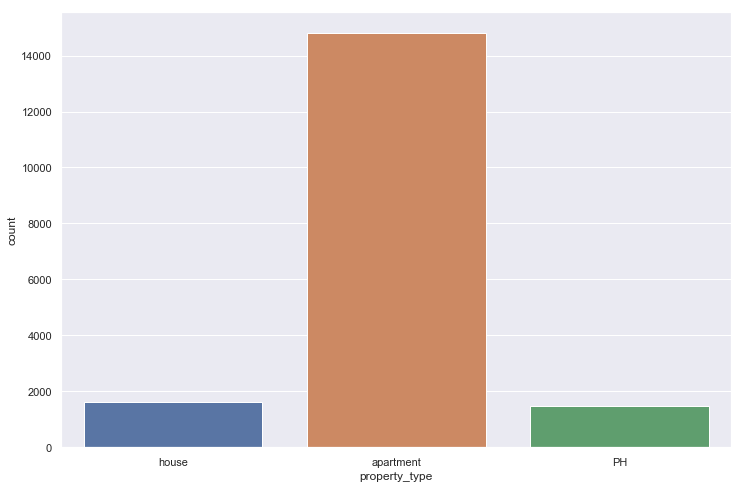

In [9]:
sns.set(style="darkgrid")
sns.countplot(x="property_type", data=df_filtered)

Parte 3)

# Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.

Estas columnas son las que informan superficie (total o cubierta), cantidad de ambientes, precio y precio por metro cuadrado.

Quitar del dataframe las instancias que no tengan ningún valor en los campos nombrados.

A continuación mostrar cuantas instancias son las que se descartaron a partir de quitar las que tenían valores nulos.

Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

Mostrá qué otros atributos tienen valores faltantes en el dataframe.


In [10]:
df_filtered.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1377
surface_total_in_m2         2197
surface_covered_in_m2       1920
price_usd_per_m2            2681
floor                      15168
rooms                       4481
expenses                   14190
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [11]:
df_filtered_dn = df_filtered.dropna(subset=['surface_total_in_m2','surface_covered_in_m2','price_aprox_usd','price_usd_per_m2','rooms'])
df_filtered_dn
##df_filtered_dn.shape


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.00,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0
30,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,490000.00,100.0,95.0,4900.000000,NaN,4.0,NaN,https://www.properati.com.ar/1e2no_venta_departamento_palermo_gimnasio_lavadero_parrilla_patio_piscina_sum_sauna_electrogeno_garage_tenis_amoblado_amenities_apto-credito-hipotecario_cityprop_fz8,PALERMO,14.0
31,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,119124.77,40.0,36.0,2978.119250,NaN,1.0,NaN,https://www.properati.com.ar/1e2of_venta_departamento_palermo_jardin_lavadero_parrilla_amenities_aprop-bienes-raices,PALERMO,14.0
32,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5722218,-58.4211164",-34.572222,-58.421116,2600000.00,400.0,400.0,6500.000000,NaN,5.0,20000.0,https://www.properati.com.ar/1e3ol_venta_departamento_palermo_balcon_suite_lavadero_toilette_vestidor_luminoso_vista_sauna_lujoso_dependencias_garage_placard_covello-propiedades_9ij,PALERMO,14.0
33,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5684721,-58.4312493",-34.568472,-58.431249,520000.00,97.0,97.0,5360.824742,NaN,3.0,10000.0,https://www.properati.com.ar/1e3oo_venta_departamento_palermo_baulera_suite_gimnasio_jardin_lavadero_piscina_sum_garage_impecable_aire-acondicionado_losa-radiante_tovado-propiedades_dk1,PALERMO,14.0
34,2017-08-31,sell,house,|Argentina|Capital Federal|Palermo|Palermo Chico|,"-34.5780733419,-58.4055800042",-34.578073,-58.405580,1975000.00,460.0,400.0,4293.478261,NaN,6.0,NaN,https://www.properati.com.ar/1e403_venta_casa_palermo-chico_castex_3200_suite_jardin_dependencias_electrogeno_garage_impecable_aire-acondicionado_arana-parera-propiedades_h3y,PALERMO,14.0


Como podemos ver se han eliminado 5913 valores (17888-11975) quedando aproximadamente el 70% de los datos y las filas con valores nulls que quedaron son las del número del piso y el monto de las expensas, que no son de gran relevancia para el analisis.

Contando los valores NaN restantes podemos ver que solo tenemos en la columna 'floor' y 'expenses'

In [12]:
df_filtered_dn.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2          0
price_usd_per_m2               0
floor                      10112
rooms                          0
expenses                    9703
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

# Desafío:

Planteá alguna/s estrategia/s posible para reemplazar los valores faltantes en el atributo surface_total_in_m2. Justificá la/s misma/s.



***El primer criterio que vamos a tomar es, calcular la superficie total en base al precio total y el precio por m2, en el caso que alguno sea nulo, tomamos el promedio de dicha variable teniendo en cuenta la zona o barrio de la propiedad.***

***En el caso en que alguno de estos valores sea nulo,  tomamos el criterio de la cantidad de habitaciones. Se realiza un promedio de cual es la superficie por habitacion, teniendo en cuenta el tipo de propiedad, ya que un dpto no va a tener los mismos ambientes que una casa y en base a la cantidad de cuartos se calcula los m2 totales.***

***Y en el caso en que todos los valores a considerar(precio, precio x m2 y rooms) sean nulos, se realizara un promedio de los m2 por tipo de propiedad y por zona.***

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


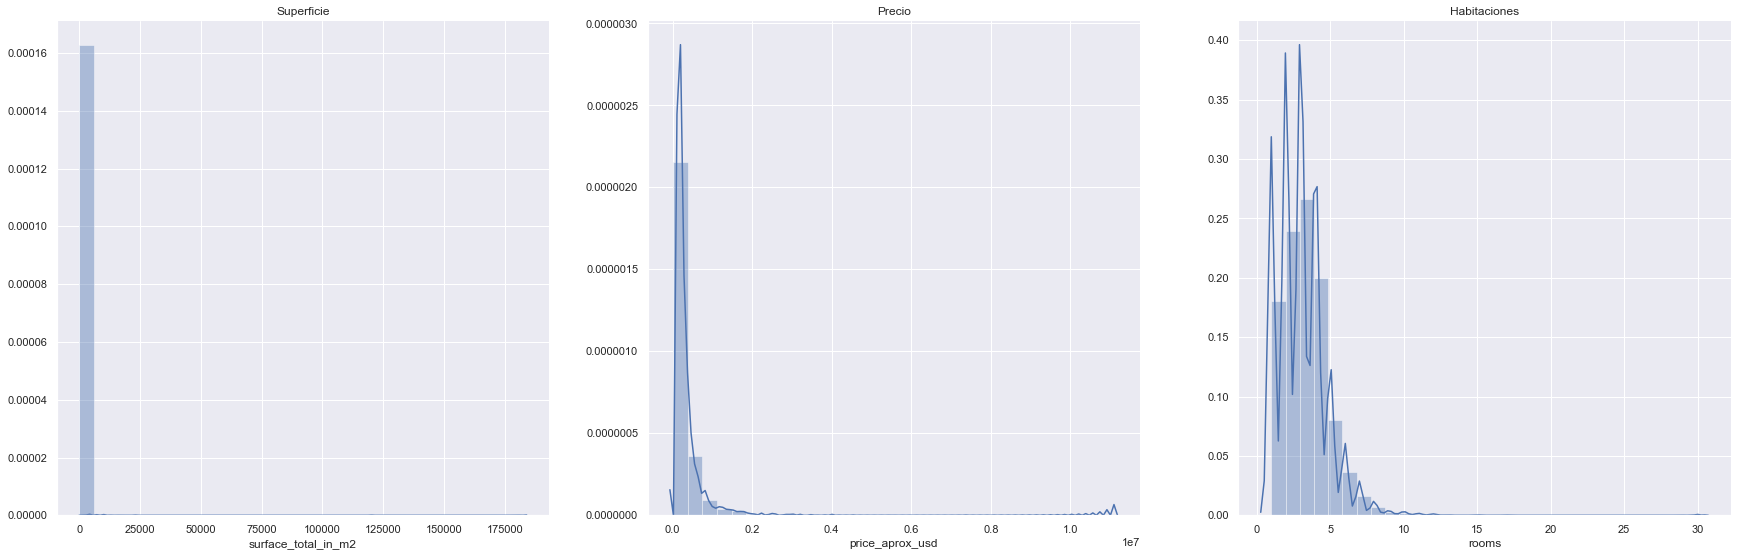

In [13]:
fig = plt.figure(figsize=(30,20))
plt.subplot2grid((2,3),(0,0))
sns.distplot(df_filtered_dn['surface_total_in_m2'], bins=30).set_title('Superficie')
#plt.xlim(0, 300)
sns.despine()
plt.subplot2grid((2,3),(0,1))
sns.distplot(df_filtered_dn['price_aprox_usd'], bins=30).set_title('Precio')
#plt.xlim(0, 0.5)
sns.despine()
plt.subplot2grid((2,3),(0,2))
sns.distplot(df_filtered_dn['rooms'], bins=30).set_title('Habitaciones')
#plt.xlim(0, 10)
sns.despine()

In [14]:
df_filtered_dn['surface_total_in_m2'].describe()


count     11975.000000
mean        141.989729
std        2032.599793
min          10.000000
25%          49.000000
50%          75.000000
75%         129.000000
max      184000.000000
Name: surface_total_in_m2, dtype: float64

In [15]:
df_filtered_dn['surface_total_in_m2'].median()

75.0

In [16]:
df_filtered_dn['surface_total_in_m2'].mode()

0    50.0
dtype: float64

In [17]:
df_filtered_dn[df_filtered['surface_total_in_m2']> 200].shape

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1423, 17)

In [18]:
df_filtered_dn[df_filtered['surface_total_in_m2']> (df_filtered_dn['surface_total_in_m2'].mean())].shape

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(2628, 17)

In [19]:
df_filtered_dn[df_filtered['surface_total_in_m2']> (df_filtered_dn['surface_total_in_m2'].mean())].groupby(['barrio','property_type']).size()

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


barrio             property_type
AGRONOMIA          PH                 4
                   house              6
ALMAGRO            PH                14
                   apartment         27
                   house             14
BALVANERA          PH                13
                   apartment         39
                   house              5
BARRACAS           PH                12
                   apartment          9
                   house             18
BELGRANO           PH                 4
                   apartment        201
                   house             18
BOCA               PH                 6
                   apartment          2
                   house              6
BOEDO              PH                10
                   apartment          3
                   house             10
CABALLITO          PH                24
                   apartment         58
                   house             13
CHACARITA          PH                10
       

***Claramente por el análisis de la variable superficie total, vemos que tiene valores outliers, y que la media esta afectada por estos valores que la desplazan  hacia valores muy grandes, que son las propiedades en barrios privados. Dichas propiedades son muy pocas y no son representativas al promedio, ya que solo 1423 propiedades estan por encima de la media, lo que no representa ni el 10% del total de la muestra. Por esto debemos dividir el analisis por barrios.***


**Revisar ya que la media es 141, no 200 que se usa para ver las 1423 propiedades. Y la parte de barrios privados, ya que son muchos barrios los que estan por encima de la media, por lo que habria que revisar esto.

Propuesta Manu:
***Claramente por el análisis de la variable superficie total, vemos que tiene valores outliers, y que la media esta afectada por estos valores muy grandes que la desplazan hacia valores mayores. 
Dichas propiedades son pocas para el análisis de todas las propiedades del dataset y no son representativas al promedio, ya que solo 2628 propiedades están por encima de la media, lo que no representa ni el 25% del total de la muestra. Por lo tanto deberíamos realizar el análisis por barrios para ver si estos datos que parecen outliers en el dataset completo, lo son por barrios.***

#### Criterio 1: Obtener Superficie a partir del Precio por barrio

In [20]:
df_filtered_sNull = df_filtered
df_filtered_sNull.shape

(17888, 17)

In [21]:
df_filtered_sNull['surface_total_in_m2'] = df_filtered_sNull['price_aprox_usd']/df_filtered_sNull['price_usd_per_m2']
df_filtered_sNull['surface_total_in_m2'].isnull().shape
# todos los valores del precio por m2 se calcula en base a la superficie porque estan todos en null

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(17888,)

In [22]:
df_filtered_sNull['surface_total_in_m2'].shape

(17888,)

In [23]:
df_filtered_sNull['surface_total_in_m2'].isnull().count()

17888

In [24]:
df_price_mean = df_filtered[['price_aprox_usd','price_usd_per_m2','barrio']].groupby(['barrio']).mean()
df_price_mean['surface_total_in_m2']= df_price_mean['price_aprox_usd']/df_price_mean['price_usd_per_m2']
df_price_mean.head(5)
#Cálculo de los promedios del precio total y precio por m2 por barrio.

,price_aprox_usd,price_usd_per_m2,surface_total_in_m2
barrio,,,
AGRONOMIA,207637.844828,2045.977245,101.485901
ALMAGRO,176200.686807,2392.315327,73.652785
BALVANERA,147061.561158,2062.864641,71.289971
BARRACAS,207610.751805,1989.518938,104.352237
BELGRANO,425560.772151,3322.164413,128.097445


In [25]:
df_filtered_sNull= df_filtered_sNull.join(df_filtered_sNull.groupby('barrio')['price_aprox_usd'].mean().rename('price_aprox_usd_mean'), on='barrio')
df_filtered_sNull

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,price_aprox_usd_mean
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,454587.321604
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,454587.321604
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,454587.321604
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,454587.321604
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,454587.321604
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,454587.321604
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,454587.321604
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,454587.321604
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604


In [26]:
df_filtered_sNull=df_filtered_sNull.join(df_filtered_sNull.groupby('barrio')['price_usd_per_m2'].mean().rename('price_usd_per_m2_mean'), on='barrio')
df_filtered_sNull


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,price_aprox_usd_mean,price_usd_per_m2_mean
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,454587.321604,3608.511550
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,454587.321604,3608.511550
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,454587.321604,3608.511550
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,454587.321604,3608.511550
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,454587.321604,3608.511550
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,454587.321604,3608.511550
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,454587.321604,3608.511550
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,454587.321604,3608.511550
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.511550
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.511550


In [27]:
df_filtered_sNull['surface_total_in_m2_mean']= df_filtered_sNull['price_aprox_usd_mean'] / df_filtered_sNull['price_usd_per_m2_mean']
df_filtered_sNull

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,price_aprox_usd_mean,price_usd_per_m2_mean,surface_total_in_m2_mean
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,454587.321604,3608.511550,125.976408
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,454587.321604,3608.511550,125.976408
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,454587.321604,3608.511550,125.976408
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,454587.321604,3608.511550,125.976408
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,454587.321604,3608.511550,125.976408
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,454587.321604,3608.511550,125.976408
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,454587.321604,3608.511550,125.976408
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,454587.321604,3608.511550,125.976408
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.511550,125.976408
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.511550,125.976408


In [28]:
df_filtered_sNull.head(10)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,price_aprox_usd_mean,price_usd_per_m2_mean,surface_total_in_m2_mean
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,454587.321604,3608.51155,125.976408
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,454587.321604,3608.51155,125.976408
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,454587.321604,3608.51155,125.976408
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,454587.321604,3608.51155,125.976408
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,454587.321604,3608.51155,125.976408
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,454587.321604,3608.51155,125.976408
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,454587.321604,3608.51155,125.976408
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,454587.321604,3608.51155,125.976408
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.51155,125.976408
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.51155,125.976408


In [29]:
df_filtered_sNull['surface_total_in_m2_dif']= df_filtered_sNull['surface_total_in_m2'] - df_filtered_sNull['surface_total_in_m2_mean']
df_filtered_sNull['surface_total_in_m2_dif'].mean()

34.83893089684456

Vemos que estimar la media de la superficie nos da un error de 34 m2 si tenemos en cuenta el precio total y por m2 por barrios

In [30]:
#reemplazamos los valores nulos 
df_filtered_sNull_c1 = df_filtered_sNull
df_filtered_sNull_c1['surface_total_in_m2_recalc'] = df_filtered_sNull_c1['surface_total_in_m2'].fillna(df_filtered_sNull_c1['surface_total_in_m2_mean'])
df_filtered_sNull_c1.head(10)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,price_aprox_usd_mean,price_usd_per_m2_mean,surface_total_in_m2_mean,surface_total_in_m2_dif,surface_total_in_m2_recalc
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,454587.321604,3608.51155,125.976408,186.023592,312.000000
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,454587.321604,3608.51155,125.976408,4.023592,130.000000
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,454587.321604,3608.51155,125.976408,-73.976408,52.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,454587.321604,3608.51155,125.976408,-55.976408,70.000000
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,454587.321604,3608.51155,125.976408,406.023592,532.000000
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,454587.321604,3608.51155,125.976408,-58.976408,67.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,454587.321604,3608.51155,125.976408,-53.976408,72.000000
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,454587.321604,3608.51155,125.976408,NaN,125.976408
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.51155,125.976408,NaN,125.976408
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lava

Manu: ***Me parece que el cálculo correcto del error de la media debería ser con valor absoluto, porque sino estamos teniendo números negativos en la diferencia entre la real y la media del barrio y eso varia nuestra media***

In [31]:
import numpy

In [32]:
df_filtered_sNull['surface_total_in_m2_dif']= numpy.abs(df_filtered_sNull['surface_total_in_m2'] - df_filtered_sNull['surface_total_in_m2_mean'])
df_filtered_sNull['surface_total_in_m2_dif'].mean()

90.72826287443127

***Podemos observar que estimar la media de la superficie nos da un error de 90.73 m2 si tenemos en cuenta el precio total y por m2 por barrios.***

In [33]:
#reemplazamos los valores nulos 
df_filtered_sNull_c1 = df_filtered_sNull
df_filtered_sNull_c1['surface_total_in_m2_recalc'] = df_filtered_sNull_c1['surface_total_in_m2'].fillna(df_filtered_sNull_c1['surface_total_in_m2_mean'])
df_filtered_sNull_c1.head(10)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,price_aprox_usd_mean,price_usd_per_m2_mean,surface_total_in_m2_mean,surface_total_in_m2_dif,surface_total_in_m2_recalc
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,454587.321604,3608.51155,125.976408,186.023592,312.000000
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,454587.321604,3608.51155,125.976408,4.023592,130.000000
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,454587.321604,3608.51155,125.976408,73.976408,52.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,454587.321604,3608.51155,125.976408,55.976408,70.000000
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,454587.321604,3608.51155,125.976408,406.023592,532.000000
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,454587.321604,3608.51155,125.976408,58.976408,67.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,454587.321604,3608.51155,125.976408,53.976408,72.000000
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,454587.321604,3608.51155,125.976408,NaN,125.976408
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,454587.321604,3608.51155,125.976408,NaN,125.976408
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero

In [34]:
df_filtered_sNull_c11=df_filtered_sNull_c1
df_filtered_sNull_c11[['surface_total_in_m2_recalc','surface_total_in_m2','barrio']].groupby('barrio').mean()

,surface_total_in_m2_recalc,surface_total_in_m2
barrio,,
AGRONOMIA,103.079194,103.469388
ALMAGRO,82.055181,83.131098
BALVANERA,78.864874,80.220764
BARRACAS,127.246757,130.275132
BELGRANO,155.366844,158.989858
BOCA,98.037187,99.624000
BOEDO,99.601422,101.383648
CABALLITO,92.206691,93.390970
CHACARITA,97.893529,99.546763


In [35]:
df_filtered_sNull_c11[['surface_total_in_m2_recalc','surface_total_in_m2','surface_total_in_m2_mean']].mean()

surface_total_in_m2_recalc    130.894722
surface_total_in_m2           136.451437
surface_total_in_m2_mean      101.277346
dtype: float64

***Si calculamos la media de la superficie total real con valores nulos y la comparamos con la media de la superficie total recalculada, se observa que al reeamplazar los valores nulos por la media del barrio se disminuye la media real del dataset.
Además, si comparamos con la media de la media por barrio vemos que el valor se aleja un poco mas de la media. Por lo tanto no es una buena medida de media para el dataset.***

#### Criterio 2: Obtener Superficie a partir de la cantidad de Habitaciones por tipo de propiedad

In [36]:
#estimo cant habitaciones por tipo propiedad
df_rooms_mean = df_filtered[['rooms','surface_total_in_m2','property_type']].groupby(['property_type']).mean()
df_rooms_mean['m2_x_room']= df_rooms_mean['surface_total_in_m2']/df_rooms_mean['rooms']
df_rooms_mean.head(5)


,rooms,surface_total_in_m2,m2_x_room
property_type,,,
PH,3.813699,230.847347,60.531093
apartment,2.824954,98.920230,35.016578
house,4.735329,472.551598,99.792763


In [37]:
df_filtered_sNull_room = df_filtered
df_filtered_sNull_room=df_filtered_sNull_room.join(df_filtered_sNull_room.groupby('property_type')['rooms'].mean().rename('rooms_mean'), on='property_type')
df_filtered_sNull_room=df_filtered_sNull_room.join(df_filtered_sNull_room.groupby('property_type')['surface_total_in_m2'].mean().rename('surface_total_in_m2_mean2'), on='property_type')
df_filtered_sNull_room

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,rooms_mean,surface_total_in_m2_mean2
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,4.735329,472.551598
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,2.824954,98.920230
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,2.824954,98.920230
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,2.824954,98.920230
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,4.735329,472.551598
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,2.824954,98.920230
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,3.813699,230.847347
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,2.824954,98.920230
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,4.735329,472.551598
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,4.735329,472.551598


In [38]:
df_filtered_sNull_room['surface_x_room']= df_filtered_sNull_room['surface_total_in_m2_mean2'] / df_filtered_sNull_room['rooms_mean']
df_filtered_sNull_room

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,rooms_mean,surface_total_in_m2_mean2,surface_x_room
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,4.735329,472.551598,99.792763
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,2.824954,98.920230,35.016578
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,2.824954,98.920230,35.016578
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,2.824954,98.920230,35.016578
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,4.735329,472.551598,99.792763
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,2.824954,98.920230,35.016578
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,3.813699,230.847347,60.531093
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,2.824954,98.920230,35.016578
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,4.735329,472.551598,99.792763
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,4.735329,472.551598,99.792763


In [39]:
df_filtered_sNull_c2 = df_filtered_sNull_room
df_filtered_sNull_c2['surface_total_in_m2_recalc'] = df_filtered_sNull_c2['surface_total_in_m2'].fillna(df_filtered_sNull_c2['surface_x_room']*(df_filtered_sNull_c2['rooms'].fillna(df_filtered_sNull_c2['rooms_mean'])))
df_filtered_sNull_c2.head(10)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,rooms_mean,surface_total_in_m2_mean2,surface_x_room,surface_total_in_m2_recalc
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,4.735329,472.551598,99.792763,312.000000
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,2.824954,98.920230,35.016578,130.000000
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,2.824954,98.920230,35.016578,52.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,2.824954,98.920230,35.016578,70.000000
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,4.735329,472.551598,99.792763,532.000000
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,2.824954,98.920230,35.016578,67.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,3.813699,230.847347,60.531093,72.000000
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,2.824954,98.920230,35.016578,175.082888
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,4.735329,472.551598,99.792763,472.551598
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,4.735329,472.551598,99.792763,472.551598


In [40]:
df_filtered_sNull_c2[['surface_total_in_m2_recalc','surface_total_in_m2','surface_total_in_m2_mean2']].mean()

surface_total_in_m2_recalc    142.876553
surface_total_in_m2           136.451437
surface_total_in_m2_mean2     143.505702
dtype: float64

***Si calculamos la media de la superficie total real con valores nulos y la comparamos con la media de la superficie total recalculada, se observa que al reeamplazar los valores nulos por la media de habitaciones por tipo de propiedad aumenta la media real del dataset.
Además, si comparamos con la media de la media de habitaciones por tipo propiedad vemos que el valor se aleja un poco mas de la media. Por lo tanto no es una buena medida de media para el dataset***

#### Criterio 3: Obtener Superficie a partir del promedio de superficies por tipo de propiedad

Una posibilidad sería poner la superficie de la media de departamentos con el mismo precio y precio por metro cuadrado. Aquellos departamentos que tengan mismo precio y precio por metro cuadrado deberían tener la misma superficie por una cuestión matemática.

In [41]:
df_filtered_sNull_c3 = df_filtered[['surface_total_in_m2','property_type']].groupby(['property_type']).mean()
df_filtered_sNull_c3.head(5)

,surface_total_in_m2
property_type,
PH,230.847347
apartment,98.920230
house,472.551598


In [42]:
df_filtered_sNull_pt = df_filtered
df_filtered_sNull_pt = df_filtered.join(df_filtered.groupby('property_type')['surface_total_in_m2'].mean().rename('surface_total_in_m2_mean_pt'), on='property_type')
df_filtered_sNull_pt.head(10)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,surface_total_in_m2_mean_pt
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,472.551598
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,98.920230
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,98.920230
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,98.920230
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,472.551598
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,98.920230
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,230.847347
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,98.920230
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,472.551598
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,472.551598


In [43]:
df_filtered_sNull_pt['surface_total_in_m2_mean_dif']= numpy.abs(df_filtered_sNull_pt['surface_total_in_m2'] - df_filtered_sNull_pt['surface_total_in_m2_mean_pt'])
df_filtered_sNull_pt['surface_total_in_m2_mean_dif'].mean()

98.95679065208212

REVISAR: ***Vemos que la diferencia es mucho menor que en los otros casos, por lo que en este caso la media de todas las superficies es acertada para rellenar los valores nulos, pero debe estar discriminada por tipo de propiedad.***

In [44]:
df_filtered_sNull_pt['surface_total_in_m2_recalc'] = df_filtered_sNull_pt['surface_total_in_m2'].fillna(df_filtered_sNull_pt['surface_total_in_m2_mean_pt'])
df_filtered_sNull_pt.head(10)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,surface_total_in_m2_mean_pt,surface_total_in_m2_mean_dif,surface_total_in_m2_recalc
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,472.551598,160.551598,312.000000
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,98.920230,31.079770,130.000000
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,98.920230,46.920230,52.000000
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,98.920230,28.920230,70.000000
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,472.551598,59.448402,532.000000
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.0,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,98.920230,31.920230,67.000000
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.0,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,230.847347,158.847347,72.000000
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,NaN,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,98.920230,NaN,98.920230
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,472.551598,NaN,472.551598
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,NaN,400.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,472.551598,NaN,472.551598


In [45]:
df_filtered_sNull_pt[['surface_total_in_m2_mean_pt','surface_total_in_m2','surface_total_in_m2_recalc']].mean()

surface_total_in_m2_mean_pt    143.505702
surface_total_in_m2            136.451437
surface_total_in_m2_recalc     143.505702
dtype: float64

***Si calculamos la media de la superficie total real con valores nulos y la comparamos con la media de la superficie total recalculada, se observa que al reeamplazar los valores nulos por la media del tipo de propiedad aumenta la media real del dataset. Además, si comparamos con la media de la media por tipo propiedad vemos que el valor se aleja un poco mas de la media. Por lo tanto no es una buena medida de media para el dataset***

Parte 4)

# Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset.

Por ejemplo, la superficie total no puede ser menor que la cubierta. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

Mostrá cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada wrong_surface_rows

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de superficie total con superficie cubierta en caso de que se cumpla la condición mencionada.


Mayor igual ponemos.. desp aclarar y describir el paso a paso.

In [46]:
df_filtered['wrong_surface_rows'] = (df_filtered['surface_total_in_m2'] >= df_filtered['surface_covered_in_m2'])
df_test = df_filtered[df_filtered['wrong_surface_rows'] == False]


C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_filtered['surface_covered_in_m2'][df_filtered['wrong_surface_rows'] == False] = df_test['surface_total_in_m2']

df_filtered['surface_total_in_m2'][df_filtered['wrong_surface_rows'] == False] = df_test['surface_covered_in_m2']


C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

In [48]:
df_test_final = df_filtered[df_filtered['wrong_surface_rows'] == False]
df_test_final
## vemos que no hay ningun valor  erroneo

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,wrong_surface_rows
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,NaN,312.0,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,False
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,False
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,NaN,72.0,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,False
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,238.0,NaN,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,False
27,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5842942,-58.4364688",-34.584294,-58.436469,NaN,400.0,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2l8_venta_casa_palermo-hollywood_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,False
28,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|,"-34.5711496,-58.4232966",-34.571150,-58.423297,NaN,400.0,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e2ll_venta_casa_palermo_balcon_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_patio_quincho_terraza_vestidor_luminoso_sauna_garage_aire-acondicionado_quicksale-propiedades_e0i,PALERMO,14.0,False
33,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5684721,-58.4312493",-34.568472,-58.431249,520000.00,97.0,97.0,5360.824742,NaN,3.0,10000.0,https://www.properati.com.ar/1e3oo_venta_departamento_palermo_baulera_suite_gimnasio_jardin_lavadero_piscina_sum_garage_impecable_aire-acondicionado_losa-radiante_tovado-propiedades_dk1,PALERMO,14.0,False
41,2017-09-01,sell,house,|Argentina|Capital Federal|Palermo|Palermo Chico|,"-34.5782697,-58.3993206",-34.578270,-58.399321,1750000.00,NaN,300.0,5833.333333,NaN,5.0,NaN,https://www.properati.com.ar/1e6c0_venta_casa_palermo-chico_balcon_jardin_lavadero_patio_piscina_quincho_terraza_toilette_vista_dependencias_garage_doble-circulacion_monica-frettes,PALERMO,14.0,False
45,2017-09-01,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5627850286,-58.4409361513",-34.562785,-58.440936,470000.00,103.0,103.0,4563.106796,NaN,4.0,10000.0,https://www.properati.com.ar/1e7yu_venta_departamento_belgrano_del-libertador-av-_5200_balcon_baulera_suite_hidromasaje_jardin_lavadero_terraza_lujoso_dependencias_electrogeno_garage_losa-radiante_filippo-propiedades_9im,PALERMO,14.0,False
50,2017-09-02,sell,house,|Argentina|Capital Federal|Belgrano|,"-34.5667748,-58.4456771",-34.566775,-58.445677,1320000.00,440.0,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1e9iq_venta_casa_belgrano_suite_gimnasio_hidromasaje_jardin_lavadero_parrilla_piscina_quincho_terraza_toilette_vestidor_vista_sauna_garage_placard_aire-acondicionado_subte-linea-d_l-e-group,PALERMO,14.0,False


df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores
que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el
análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [49]:
filter=['PH','apartment','house']
df_filtered=df[df['property_type'].isin(filter)]

conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.589546  -58.397364    155
-34.571150  -58.423297    127
-34.562084  -58.456686     87
-34.620928  -58.445874     49
-34.609821  -58.392606     44
-34.622973  -58.439913     41
-34.608608  -58.448515     40
-34.603771  -58.381587     36
-34.617719  -58.362056     36
-34.610122  -58.405941     32
dtype: int64

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento. Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.


In [50]:
df_filtered_conteo2=df_filtered.join(df_filtered.groupby(['lat', 'lon']).size().rename('conteo'), on=['lat', 'lon'])
df_filtered_conteo2[df_filtered_conteo2['conteo']<=5]

#conteo_puntos.name = 'conteo'
#df_filtered_conteo = df_filtered.join(conteo_puntos, on=['lat', 'lon'])
#df_filtered_conteo = df_filtered_conteo[df_filtered_conteo.conteo <= 5]
#df_filtered_conteo

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,conteo
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0,1
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.00,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14.0,1
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.00,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14.0,1
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.00,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14.0,1
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.00,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14.0,1
24,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5809281,-58.4404321",-34.580928,-58.440432,270000.00,67.0,64.0,4029.850746,NaN,3.0,3900.0,https://www.properati.com.ar/1e1x0_venta_departamento_palermo-hollywood_arevalo_1700_balcon_toilette_luminoso_apto-credito-hipotecario_yankel-group,PALERMO,14.0,1
25,2017-08-30,sell,PH,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.5897765,-58.428558",-34.589776,-58.428558,219000.00,72.0,NaN,3041.666667,NaN,3.0,NaN,https://www.properati.com.ar/1e1xj_venta_ph_palermo-soho_honduras_4800_patio_luminoso_ojo-propiedades,PALERMO,14.0,1
26,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5807098,-58.3981425",-34.580710,-58.398143,NaN,238.0,238.0,NaN,NaN,5.0,NaN,https://www.properati.com.ar/1e2js_venta_departamento_palermo_baulera_suite_luminoso_dependencias_garage_amenities_subte-linea-h_abp-consultora-inmobiliaria,PALERMO,14.0,1
29,2017-08-30,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.594251,-58.4166447",-34.594251,-58.416645,250000.00,67.0,60.0,3731.343284,NaN,2.0,NaN,https://www.properati.com.ar/1e2mz_venta_departamento_palermo_balcon_lavadero_parrilla_piscina_aire-acondicionado_apto-credito-hipotecario_ageo-propiedades_dwr,PALERMO,14.0,1
32,2017-08-31,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5722218,-58.4211164",-34.572222,-58.421116,2600000.00,400.0,400.0,6500.000000,NaN,5.0,20000.0,https://www.properati.com.ar/1e3ol_venta_departamento_palermo_balcon_suite_lavadero_toilette_vestidor_luminoso_vista_sauna_lujoso_dependencias_garage_placard_covello-propiedades_9ij,PALERMO,14.0,1


Parte 5)

# Estudiando los barrios

# Barrios con más edificios y barrios con más casas

Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos
una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. Para eso vamos a empezar
calculando los porcentajes de cada tipo de propiedad según el barrio.

In [51]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count()
total_propiedades

barrio
AGRONOMIA              61
ALMAGRO               740
BALVANERA             988
BARRACAS              214
BELGRANO             1117
BOCA                  136
BOEDO                 182
CABALLITO            1218
CHACARITA             158
COGHLAN               130
COLEGIALES            273
CONSTITUCION          255
FLORES                811
FLORESTA              189
LINIERS               328
MATADEROS             209
MONSERRAT             364
MONTE CASTRO          154
NUEVA POMPEYA          97
NUEZ                  422
PALERMO              2329
PARQUE AVELLANEDA     120
PARQUE CHACABUCO      288
PARQUE CHAS            93
PARQUE PATRICIOS      136
PATERNAL              106
PUERTO MADERO         339
RECOLETA             1571
RETIRO                550
SAAVEDRA              304
SAN CRISTOBAL         214
SAN NICOLAS           574
SAN TELMO             231
VELEZ SARSFIELD       136
VERSALLES              71
VILLA CRESPO          658
VILLA DEL PARQUE      234
VILLA DEVOTO          345
VILLA

In [52]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [53]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    0.994100
RECOLETA         0.975175
RETIRO           0.970909
SAN NICOLAS      0.956446
BELGRANO         0.928380
Name: property_type, dtype: float64
Barrios con mayor porcentaje de casas y phs: 
  barrio
VILLA RIACHUELO      0.760000
VERSALLES            0.661972
MATADEROS            0.612440
PARQUE AVELLANEDA    0.591667
NUEVA POMPEYA        0.587629
Name: property_type, dtype: float64


In [54]:
## Otra forma de resolverlo: armo dos datasets y realizo los calculos, llegando al mismo resultado
df_filtered_casas=df[df['property_type'].isin(['PH','house'])]
df_filtered_edificios=df[df['property_type'].isin(['apartment'])]

total_propiedades_barrio = df_filtered.groupby('barrio')['property_type'].count()
total_casas_barrio = df_filtered_casas.groupby('barrio')['property_type'].count()
total_edificios_barrio = df_filtered_edificios.groupby('barrio')['property_type'].count()
total_casas=total_casas_barrio/total_propiedades_barrio
total_edif=total_edificios_barrio/total_propiedades_barrio


Barrios con mayor porcentaje de casas:

In [55]:
total_casas.sort_values(ascending=False).to_frame().head(5)

,property_type
barrio,
VILLA RIACHUELO,0.760000
VERSALLES,0.661972
MATADEROS,0.612440
PARQUE AVELLANEDA,0.591667
NUEVA POMPEYA,0.587629


Barrios con mayor porcentaje de edificios

In [56]:
total_edif.sort_values(ascending=False).to_frame().head(5)

,property_type
barrio,
PUERTO MADERO,0.994100
RECOLETA,0.975175
RETIRO,0.970909
SAN NICOLAS,0.956446
BELGRANO,0.928380


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos en forma de torta.

In [57]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

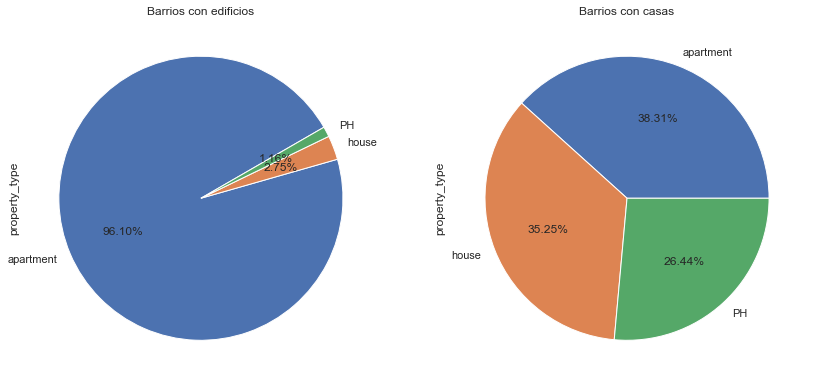

In [58]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', title='Barrios con edificios',startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie',title='Barrios con casas', ax=axs[1],autopct='%1.2f%%')

In [59]:
total_propiedades_barrio.sort_values(ascending=False).to_frame().head(5)
#5 barrios con mas propiedades

,property_type
barrio,
PALERMO,2329
RECOLETA,1571
CABALLITO,1218
BELGRANO,1117
BALVANERA,988


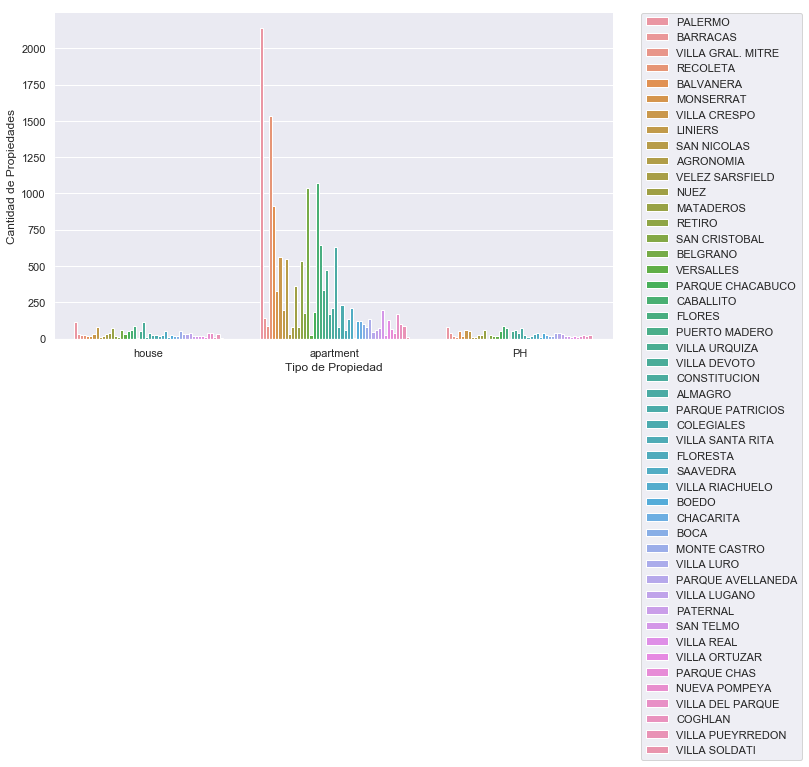

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_filtered, x='property_type', 
                hue='barrio')
plt.ylabel('Cantidad de Propiedades')
plt.xlabel('Tipo de Propiedad')
#plt.ylim(0, 4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(left=True)

# Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que
consideremos extremos.

Tomando el atributo price_usd_per_m2 calculá su mínimo, máximo, promedio (mean), mediana (median) y desvío estándar (std).

También podemos calcular otros estadísticos como los cuartiles.

Mostrá el primer y tercer cuartil y luego también el rango intercuartilíco.


In [61]:
df_price = df_filtered[['price_usd_per_m2']]
df_price

,price_usd_per_m2
0,6410.256410
18,2615.384615
19,4269.230769
20,2571.428571
22,2255.639098
24,4029.850746
25,3041.666667
26,NaN
27,NaN
28,NaN


In [62]:
df_price_desc = df_price.describe()
df_price_desc


,price_usd_per_m2
count,15207.000000
mean,2748.896095
std,1863.791284
min,0.958333
25%,2000.000000
50%,2555.555556
75%,3160.919540
max,142450.141026


Cálculo de la Mediana

In [63]:
df_price.median()

price_usd_per_m2    2555.555556
dtype: float64

In [64]:
df_price_q1 = df_filtered['price_usd_per_m2'].quantile(0.25)
df_price_q3 = df_filtered['price_usd_per_m2'].quantile(0.75)
df_iqr = df_price_q3 - df_price_q1

print("Q1: \n", df_price_q1)
print("Q3: \n", df_price_q3)
print("El rango interquartil: \n", df_iqr)
#print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Q1: 
 2000.0
Q3: 
 3160.919540229885
El rango interquartil: 
 1160.9195402298851


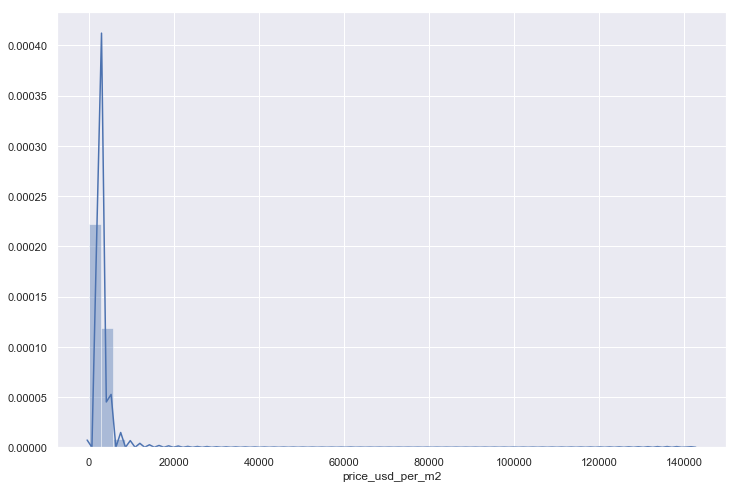

In [65]:
#plt.figure(figsize=(10,6))
sns.distplot(df_filtered['price_usd_per_m2'].dropna())

# Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [66]:
df_price = df_price.dropna()

In [67]:
p10 = np.percentile(df_price.price_usd_per_m2, 10)
p90 = np.percentile(df_price.price_usd_per_m2, 90)

df_filtered_sin_extremos = df_price[(df_price.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [68]:
df_price[(df_price.price_usd_per_m2 < p10)].count()

price_usd_per_m2    1521
dtype: int64

In [69]:
df_price[(df_price.price_usd_per_m2 > p90)].count()

price_usd_per_m2    1521
dtype: int64

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.
Volvér a calcular los mismos estadísticos (min, max, promedio, etc) para ver los cambios. ¿Por qué será que la mediana no cambia?

***El rango de valores se redujo y esto generó que la desviación estandar sea menor así también como la media .***

In [70]:
df_filtered_sin_extremos['price_usd_per_m2'].describe()

count    12165.000000
mean      2595.804154
std        598.577775
min       1524.347105
25%       2122.500000
50%       2555.555556
75%       3015.151515
max       4041.666667
Name: price_usd_per_m2, dtype: float64

In [71]:
df_filtered_sin_extremos.median()

price_usd_per_m2    2555.555556
dtype: float64

***La mediana no cambia ya que la misma indica el valor medio de la distribución y como hemos quitado el 10% de cada lado de la distribución la mediana no cambió.***

***Hacemos el histograma nuevamente y podemos ver que la distribución no muestra grandes picos en los valores y se acerca más a una campana.***

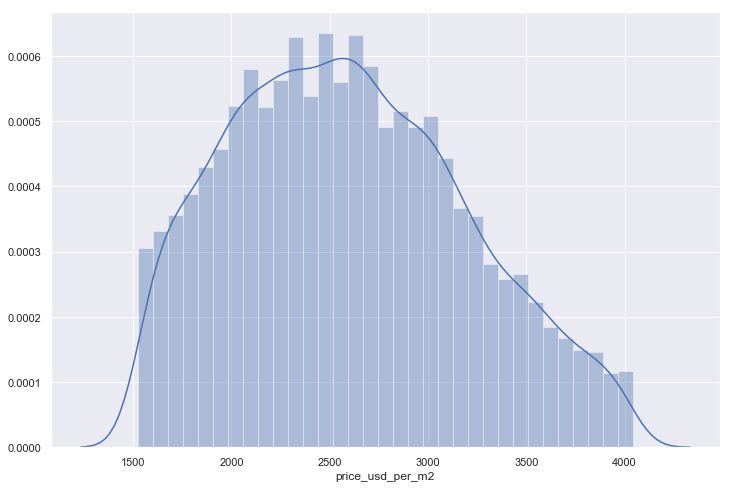

In [72]:
sns.distplot(df_filtered_sin_extremos['price_usd_per_m2'].dropna())

Vamos a graficar ahora los barrios según el precio por metro cuadrado.

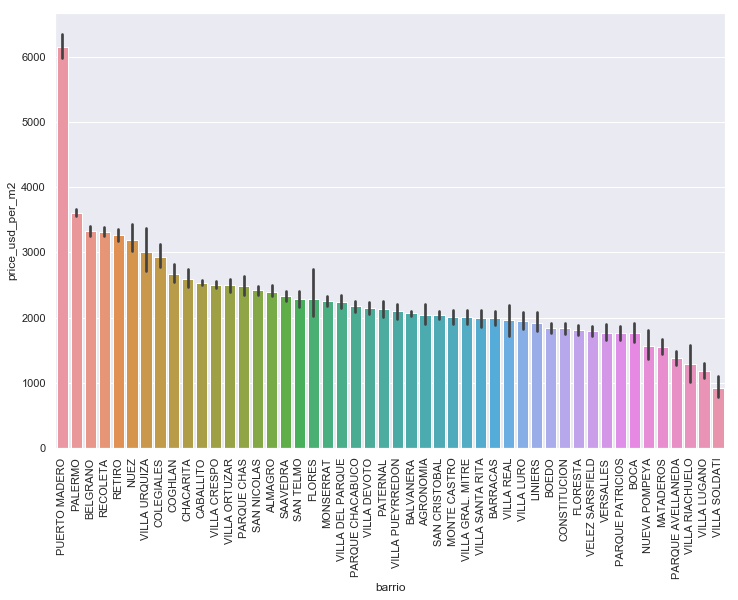

In [73]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

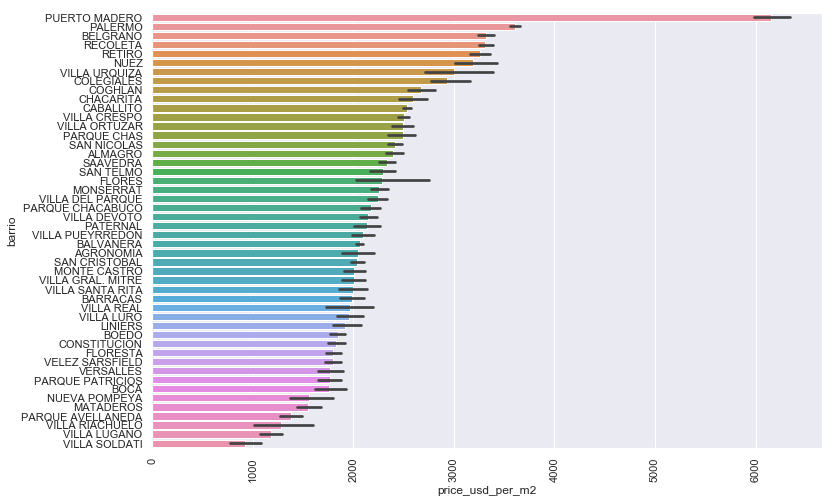

In [74]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="price_usd_per_m2", y="barrio", order=barrios, data=df_filtered);

#### Más caros

In [75]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Más baratos

In [76]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


# Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:

* Superficie total en m2

* Cuartos totales 

* Precio en dolares por m2


In [77]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

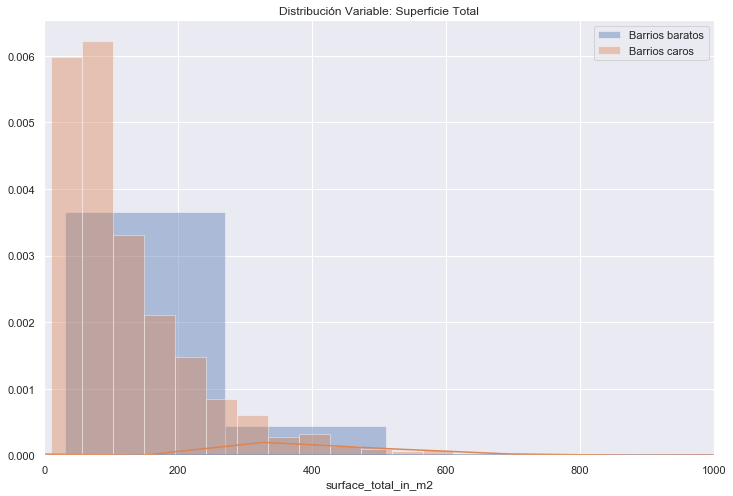

In [78]:
g = sns.distplot(df_filtered_dn[df_filtered_dn.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos", bins=500)
sns.distplot(df_filtered_dn[df_filtered_dn.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros", bins=500)
g.set_xlim(0, 1000)
plt.title("Distribución Variable: Superficie Total")
plt.legend()

C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Gabriel H\.conda\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


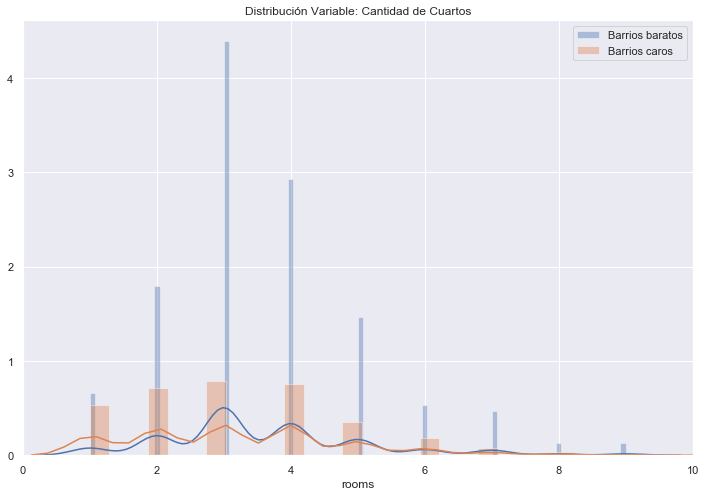

In [79]:
g = sns.distplot(df_filtered_dn[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos", bins=100)
sns.distplot(df_filtered_dn[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros" , bins=100)
g.set_xlim(0, 10)
plt.title("Distribución Variable: Cantidad de Cuartos")
plt.legend()

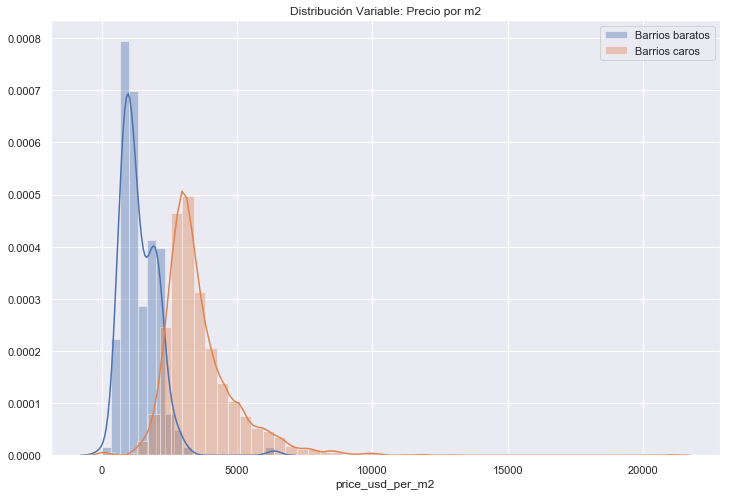

In [80]:
g = sns.distplot(df_filtered_dn[df_filtered_dn.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered_dn[df_filtered_dn.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.title("Distribución Variable: Precio por m2")
plt.legend()

# Desafío:

En cada uno de los tres gráficos realizados en el punto anterior. Responder:

La distribución coincide con algunas vistas en clases. ¿Porque?. Analizar si presentan algún sesgo, achatamiento, escalonado, etc.

***Si analizamos el primer gráfico (sobre la variable "surface_total_in_m2"), podemos observar muy marcado para "barrios caros", que la distribución parece una exponencial.***

***Para el caso de "barrios baratos" tambien parece una gráfica con distribucion exponencial pero se visualiza escalonada en donde se observa la misma cantidad de valores para un rango de superficies y luego la misma cantidad pero para otro rango de superficie.***
***


***Si analizamos el segundo gráfico (sobre la variable "rooms"), podemos observar muy marcado para "barrios caros" y "barrios baratos", que la distribución parece una poisson. Esta distribución se define ya que la variable analizada es discreta.***

***La distribución de "barrios caros" posee un achatamiento en comparación con la de "barrios baratos" ya que la cantidad de barrios del dataset es menor para barrios caros.*** 

***
***Si analizamos el tercer gráfico (sobre la variable "price_usd_per_m2"), podemos observar para "barrios caros", que la distribución parece normal.***

***Para el caso de "barrios baratos" parece una gráfica con una distribución ji-cuadrada.***

- Análisis Asimetría Superficie Total

Tanto para barrios caros como para barrios baratos el CAF de la superficie total nos dió positivo lo que nos indica la asmimetría hacia el lado izquierdo 

In [81]:
baratos_sup_tot = df_filtered_dn[df_filtered_dn.barrio.isin(barrios_baratos)].surface_total_in_m2
caros_sup_tot = df_filtered_dn[df_filtered_dn.barrio.isin(barrios_caros)].surface_total_in_m2

caf_baratos_sup_tot = stats.skew(baratos_sup_tot)
caf_caros_sup_tot = stats.skew(caros_sup_tot)

print("CAF Superficie Total  barrios baratos: \n" ,caf_baratos_sup_tot )
print("CAF Superficie Total  barrios caros: \n" ,caf_caros_sup_tot )


CAF Superficie Total  barrios baratos: 
 13.598080673240528
CAF Superficie Total  barrios caros: 
 36.378683314286114


- Análisis Asimetría Cantidad de Cuartos

In [82]:
baratos_precio_m2 = df_filtered_dn[df_filtered_dn.barrio.isin(barrios_baratos)].price_usd_per_m2
caros_precio_m2 = df_filtered_dn[df_filtered_dn.barrio.isin(barrios_caros)].price_usd_per_m2
caf_baratos_pm2 = stats.skew(baratos_precio_m2)
caf_caros_pm2 = stats.skew(caros_precio_m2)

print("CAF Superficie Total  barrios baratos: \n" ,caf_baratos_pm2 )
print("CAF Superficie Total  barrios caros: \n" ,caf_caros_pm2 )


CAF Superficie Total  barrios baratos: 
 2.298934408944905
CAF Superficie Total  barrios caros: 
 2.38897538536763


# Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota (blog), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.
Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo place_with_parent_names, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada barrio_publicado.

De este modo, lo que vamos a analizar es como se relacionan las columnas barrio y barrio publicado. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por |. Por ejemplo, en |Argentina|Capital Federal|Palermo| vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo).

De este modo, una estrategia posible para resolver esto es separar las jerarquías por | y extraer el elemento asociado al barrio. Por ejemplo, para |Argentina|Capital Federal|Palermo| queda ['', 'Argentina', 'Capital Federal', 'Palermo', '']. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.


In [83]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

array([6, 5, 4], dtype=int64)

Como algunos tienen 4 elementos, debemos quitarlos.

In [84]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [85]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [86]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

# Desafío 

Realizar una tabla de doble entrada para identificar para cada barrio cuál es al que más quiere parecerse. ¿Que concluiones podemos sacar?

Ayuda:

In [87]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

barrio
AGRONOMIA                       AGRONOMAA
ALMAGRO                             BOEDO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUAEZ
BOCA                             BARRACAS
BOEDO                    PARQUE PATRICIOS
CABALLITO                           BOEDO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                CONSTITUCIA3N
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                  VILLA SANTA RITA
MATADEROS               PARQUE AVELLANEDA
MONSERRAT                       SAN TELMO
MONTE CASTRO                     FLORESTA
NUEVA POMPEYA                     POMPEYA
NUEZ                                NUAEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS                

# Desafío

Analizar si hay correlaciones entre las variables surface_total_in_m2, rooms y price.

¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Por qué?

Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.


- Análisis Superficie Total y Precio por m2

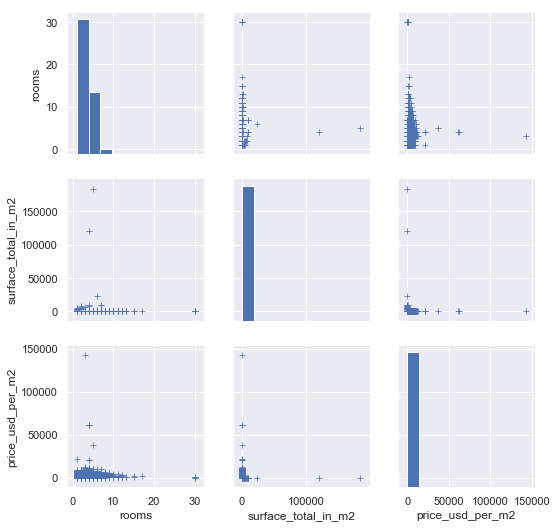

In [138]:
sns.pairplot(
    data=df_filtered_dn,
    vars=['rooms', 'surface_total_in_m2', 'price_usd_per_m2'],
     
    markers='+')

En este gráfico podemos ver que a simple vista no se ve una correlación marcada entre las variables. Siendo este análisis poco revelador, continuamos el análisis tomando la comparación del precio total de cada propiedad en lugar del precio por m2.

- Superficie Total y Precio Total

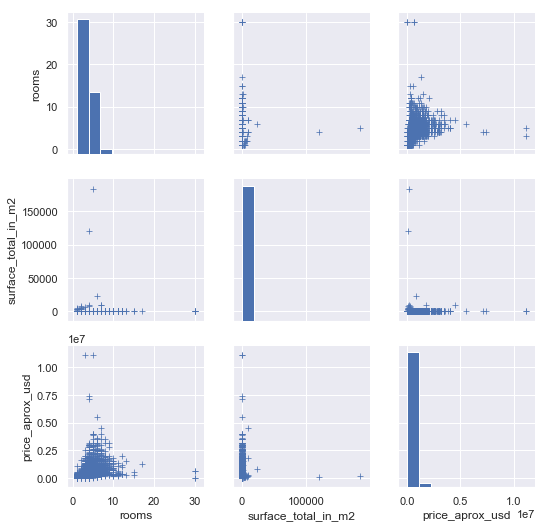

In [137]:
sns.pairplot(
    data=df_filtered_dn,
    vars=['rooms', 'surface_total_in_m2', 'price_aprox_usd'],
     
    markers='+')

Si bien se ve mejor que el primer caso, no se alcanza a distinguir bien posible correlación entre las variables entonces proponemos eliminar los valores extremos de las variables superficie total y precio total

- Limpieza de las variables: planteamos el análisis sin valores extremos

Eliminamos Extremos de Superficie Total

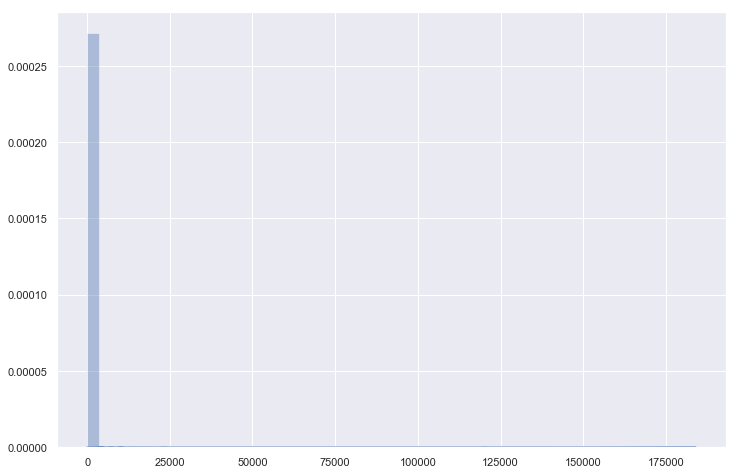

In [89]:
df_sup_total=df_filtered_dn[['surface_total_in_m2']]
sns.distplot(df_sup_total)


In [90]:
p10 = np.percentile(df_sup_total.surface_total_in_m2, 10)
p90 = np.percentile(df_sup_total.surface_total_in_m2, 90)

df_sup_sin_ext = df_sup_total[(df_sup_total.surface_total_in_m2 >= p10) & (df_sup_total.surface_total_in_m2 <= p90)]

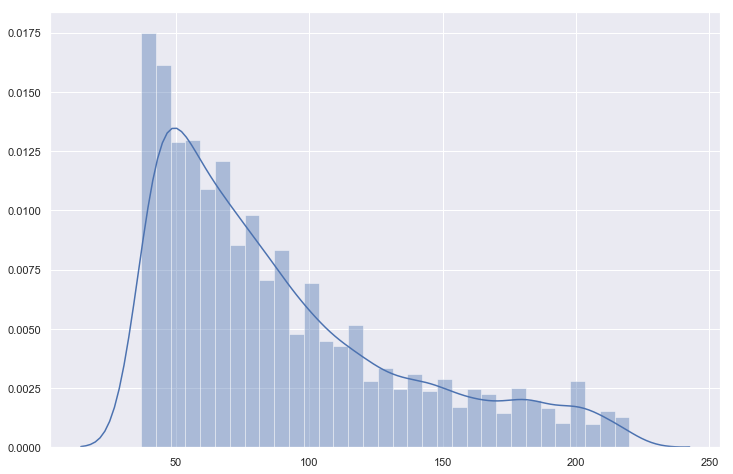

In [91]:
sns.distplot(df_sup_sin_ext)

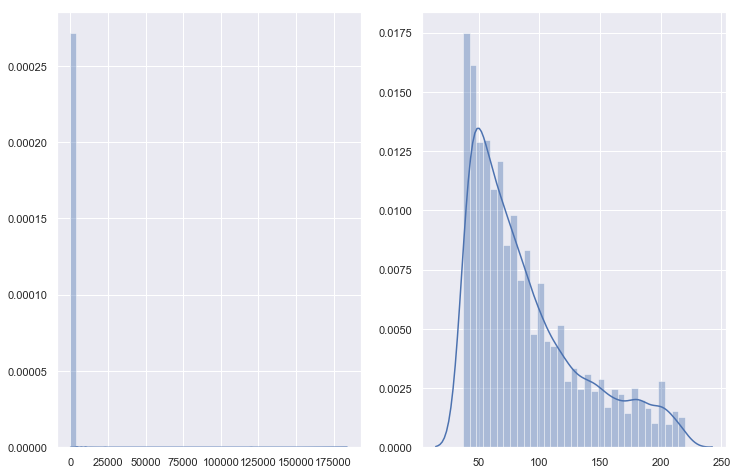

In [92]:
#Graficamos las dos juntas
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(df_sup_total, ax=ax1)

sns.distplot(df_sup_sin_ext, ax=ax2)
plt.show()

***No*** eliminamos extremos de la variable rooms

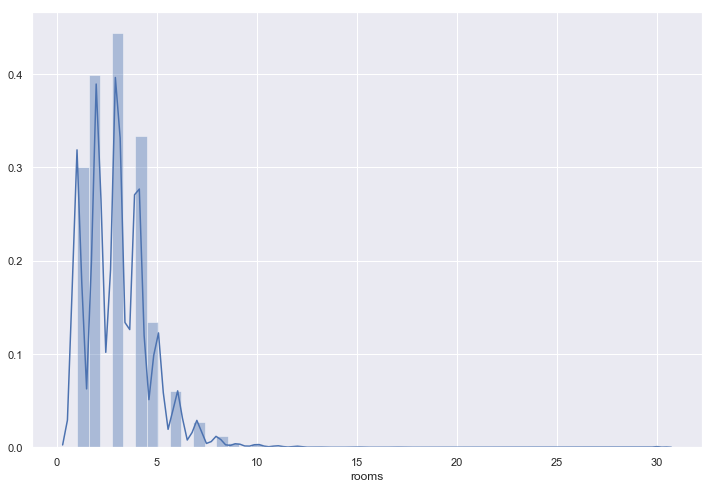

In [93]:
sns.distplot(df_filtered_dn['rooms'])

Eliminamos extremos del precio total

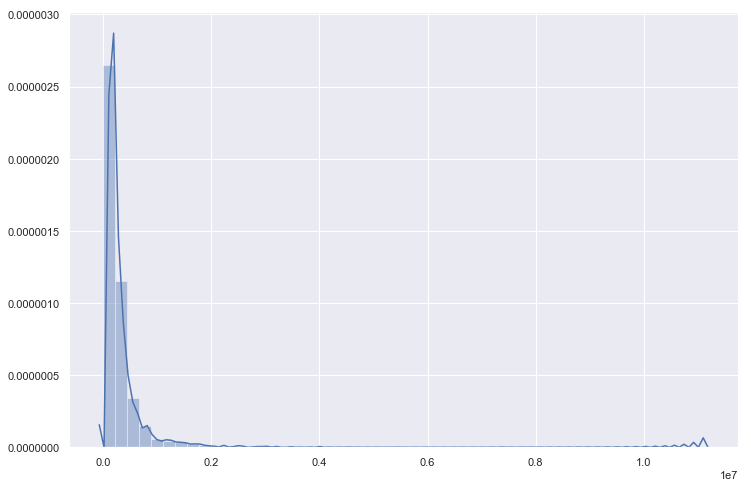

In [94]:
df_precio_total=df_filtered_dn[['price_aprox_usd']]
sns.distplot(df_precio_total)


In [95]:
p10 = np.percentile(df_precio_total.price_aprox_usd, 10)
p90 = np.percentile(df_precio_total.price_aprox_usd, 90)

df_precio_sin_ext = df_precio_total[(df_precio_total.price_aprox_usd >= p10) & (df_precio_total.price_aprox_usd <= p90)]

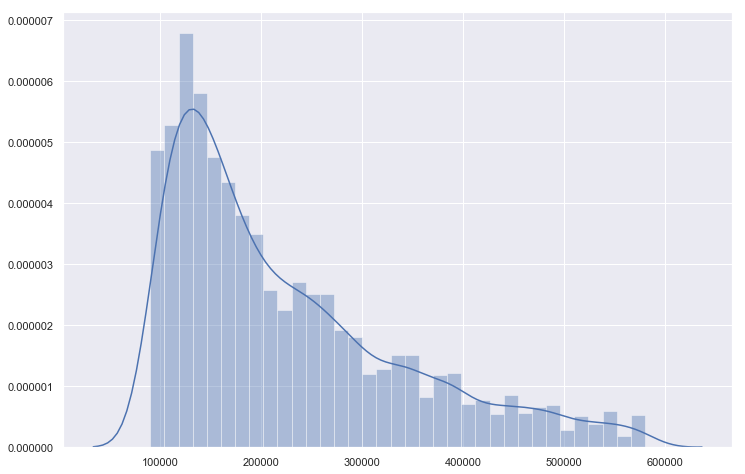

In [96]:
sns.distplot(df_precio_sin_ext)

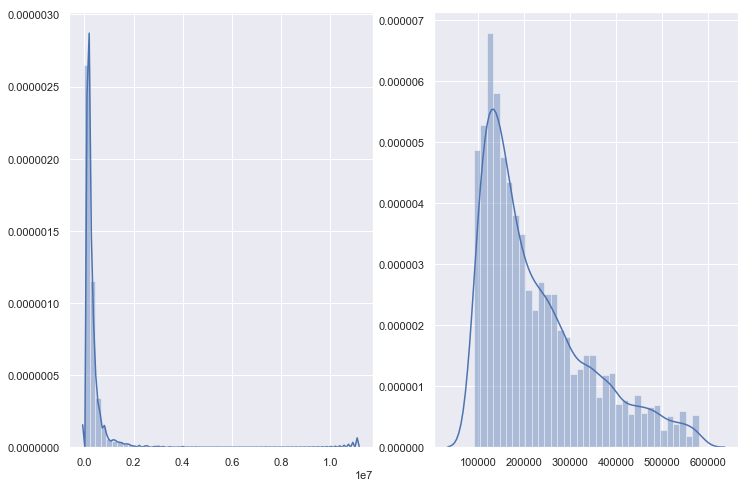

In [97]:
#Graficamos las dos juntas
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(df_precio_total, ax=ax1)

sns.distplot(df_precio_sin_ext, ax=ax2)
plt.show()

-Rearmamos un df sin los valores extremos en estas variables y apartir de aquí trabajamos con este dataframe sin extremos

In [141]:
df_sin_extremos = pd.concat([df_precio_sin_ext, df_sup_sin_ext,df_filtered_dn[['rooms']],df_filtered_dn[['price_usd_per_m2']],df_filtered_dn[['barrio']]], axis=1, sort=False).dropna()
df_sin_extremos

,price_aprox_usd,surface_total_in_m2,rooms,price_usd_per_m2,barrio
18,340000.00,130.0,4.0,2615.384615,PALERMO
19,222000.00,52.0,1.0,4269.230769,PALERMO
24,270000.00,67.0,3.0,4029.850746,PALERMO
29,250000.00,67.0,2.0,3731.343284,PALERMO
30,490000.00,100.0,4.0,4900.000000,PALERMO
31,119124.77,40.0,1.0,2978.119250,PALERMO
33,520000.00,97.0,3.0,5360.824742,PALERMO
35,198000.00,64.0,2.0,3093.750000,PALERMO
36,170000.00,40.0,1.0,4250.000000,PALERMO
37,159800.00,47.0,1.0,3400.000000,PALERMO


- Correlación entre Superficie Total y Precio por m2

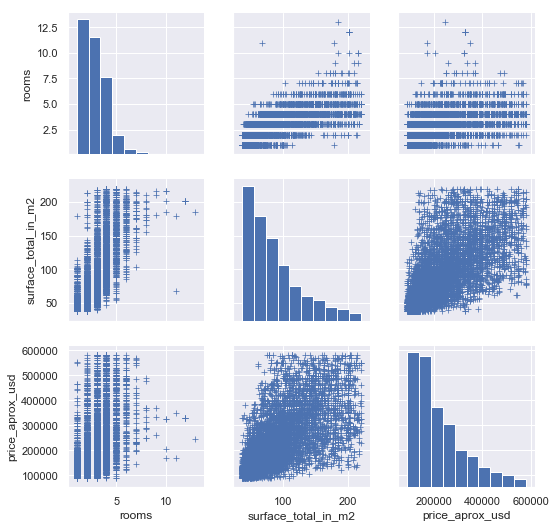

In [142]:
sns.pairplot(
    data=df_sin_extremos,
    vars=['rooms', 'surface_total_in_m2', 'price_aprox_usd'],
     
    markers='+')

Aquí se puede apreciar que la variable precio total aumenta a medida que aumenta la superficie total y también que la variable precio total aumenta a medida que la propiedad tiene mas cuartos. Pero, vemos en las gráficas que existen propiedades de baja superficie a precios similares de propiedades de gran superficie. 

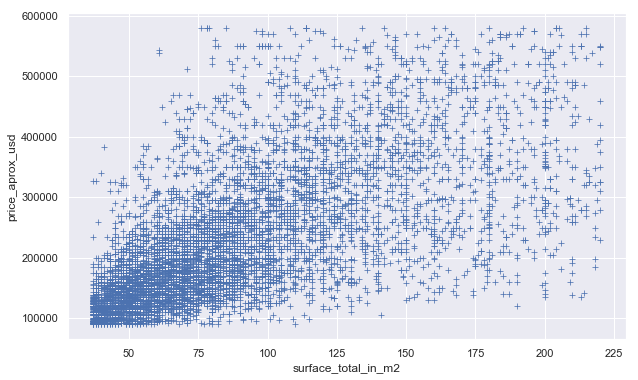

In [143]:
#df_filtered_dn, esta usaba antes! queda mucho mejor con todo limpio sin extremos

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_sin_extremos,
    x='surface_total_in_m2', y='price_aprox_usd',     
    marker='+')

Calculamos el coeficiente de correlación de spearman para el precio total y la superficie total:

In [144]:
df_sup_pri_tot = df_sin_extremos[['surface_total_in_m2','price_aprox_usd']]
df_sup_pri_tot.corr(method='spearman')

,surface_total_in_m2,price_aprox_usd
surface_total_in_m2,1.00000,0.74295
price_aprox_usd,0.74295,1.00000


Podemos observar que nos da una correlación positiva y mucho mas cerca a 1, lo cual corresponde a lo observado en el gráfico. 

Sin embargo, profundizamos aún mas el análisis considerando que es importante analizar la correlación de estas variables haciendo una separación por barrio. Ya que, la variable barrio tiene una gran influencia en el precio. En muchos casos, propiedades de grandes superficies en barrios baratos tienen menores precios que propiedades de menor superficie en barrios caros. Tomamos como ejemplo dos barrios puntuales: Palermo (dentro de los 5 más caros) y Villa Crespo (barrio intermedio). Para acompañar este análisis nos hacemos la siguiente pregunta:

***¿Un departamento pequeño en Palermo es más caro que un gran departamento en Villa Crespo?***


Planteamos el pairplot para el barrio Palermo:

In [145]:
df_palermo = df_sin_extremos[df_sin_extremos['barrio'] == 'PALERMO']

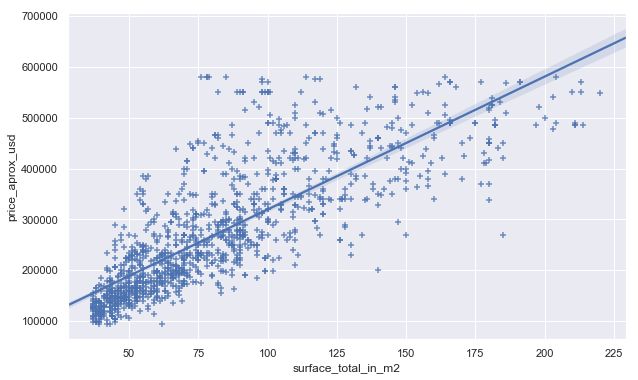

In [146]:
#df_filtered_dn en este caso está bueno verlo sin los extremos quizas. Consultar
plt.figure(figsize=(10,6))
sns.regplot(
    data=df_palermo,
    x='surface_total_in_m2', y='price_aprox_usd',     
    marker='+')

Podemos ver a simple vista que a medida aumenta la superficie aumenta el precio y los puntos se aproximan a la recta con algún error. El coeficiente de correlación de spearman obtenido fue el siguiente:

In [147]:
df_room_pri_paler = df_palermo[['surface_total_in_m2','price_aprox_usd']]
df_room_pri_paler.corr(method='spearman')

,surface_total_in_m2,price_aprox_usd
surface_total_in_m2,1.000000,0.855631
price_aprox_usd,0.855631,1.000000


Siendo de 0.85 podemos ver que se confirma lo analizado a simple vista ya que tenemos un grado intenso de correlación positiva. 

- Correlación entre Rooms y Precio para Palermo

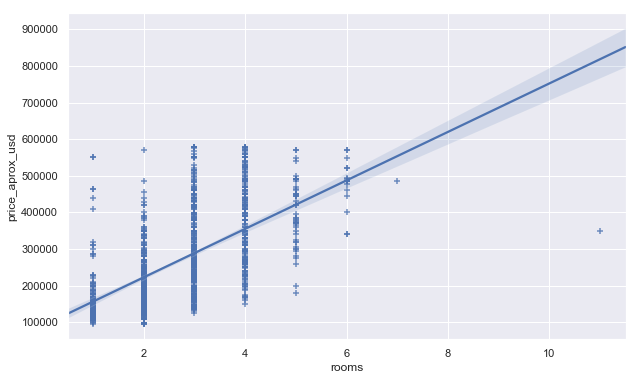

In [105]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df_palermo,
    x='rooms', y='price_aprox_usd',     
    marker='+')

Con menor grado de intensidad aparece una correlación entre las variables, pero no tan grande como el caso anterior. Aplicamos nuevamente spearman y obtenemos un coeficiente positivo menor al anterior:

In [106]:
df_room_pri_tot = df_palermo[['rooms','price_aprox_usd']]
df_room_pri_tot.corr(method='spearman')

,rooms,price_aprox_usd
rooms,1.000000,0.667537
price_aprox_usd,0.667537,1.000000


En última instancia realizamos conjuntamente el scatter plot de las variables superficie total y precio total para todos los barrios conjuntos en comparación a considerar únicamente Palermo.

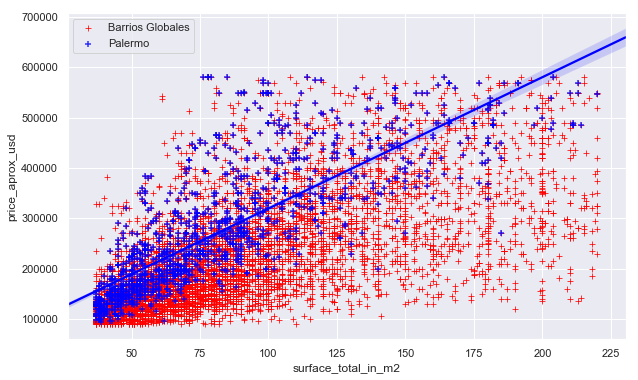

In [148]:
plt.figure(figsize=(10,6))
totalx = sns.scatterplot(
    data=df_sin_extremos,
    x='surface_total_in_m2', y='price_aprox_usd',     
    marker='+',color='red',label='Barrios Globales')

palx = sns.regplot(
    data=df_palermo,
    x='surface_total_in_m2', y='price_aprox_usd',     
    marker='+',color='blue',label='Palermo')

totalx
palx.legend(loc="best")

Se puede observar en un mismo gráfico lo que planteamos anteriormente respecto de la importancia de analizar por barrio, ya que Palermo en azul demuestra estar mas cerca de la recta. No así los puntos en rojos que están mas dispersos, representando los casos de todos los barrios mezclados.

- Análisis Barrios Caros

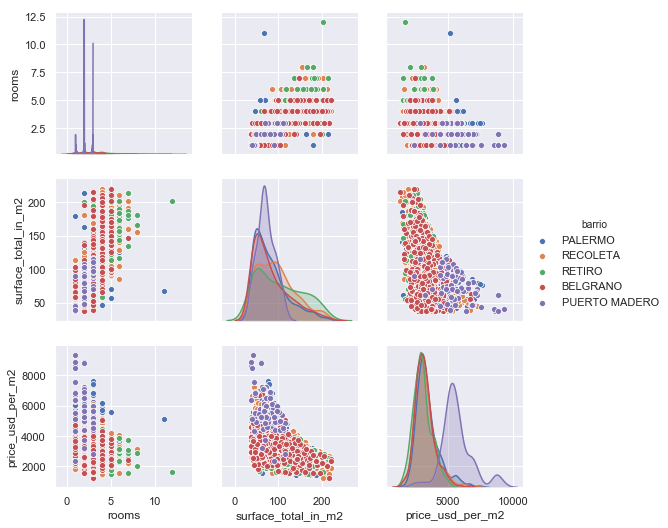

In [107]:
df_barrios_caros = df_sin_extremos[df_sin_extremos.barrio.isin(barrios_caros)]
sns.pairplot(
    data=df_barrios_caros,
    vars=['rooms', 'surface_total_in_m2', 'price_usd_per_m2'],hue='barrio')

En el mismo podemos ver como cada uno tiene una tendencia similar y como Puerto Madero (el más caro) se diferencia mucho del resto.

# Informe final

Presentar un informe final con los datos inferidos del dataset utilizando herramientas gráficas y escritas teniendo en cuenta los destinatarios. En este caso colegas de la diplomatura para preparar el informe con un background adecuado al destinatario.